In [1]:
!pip install sdv
!pip install pyqt5<5.16
!pip install pyqtwebengine<5.16

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)


/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
bash: 5.16: No such file or directory
/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version inform

In [2]:
!pip install 'cloudpickle>=2.1.0,<3.0'


/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)


In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import sdv
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
data = pd.read_csv('/project/data_normalized.csv')

In [27]:
data.columns

Index(['Storefront', 'Visible Sign of Business', 'Business WiFi',
       'Business tables', 'Business Plugs', 'Business Internal CCTV',
       'External CCTV', 'Number of female employees', 'Accepts credit card',
       'Incline', 'Width', 'Ramp conditions', 'Ramp // Crosswalk',
       'Ramp obstacles', 'Crosswalk width', 'Vertical signs',
       'Crossing length', 'Access to people with disabilities',
       'Pedestrian strip width', 'Strip services', 'Material',
       'Status of maintenance', 'Continuity', 'Temporary obstacles', 'Benches',
       'Trees', 'Planters', 'Commerciality', 'Percentage of parking accesses',
       'Broken public property', 'Incivility', 'Obstacles',
       'Physical aspects in poor condition', 'Poor infrastructure',
       'Positive elements', 'Broken drain-cover', 'Drug addicts',
       'Federal Judiciary', 'Panic button', 'Vandalism', 'graffiti',
       'homelessness', 'inclined ramp', 'indication of security',
       'mobile vendors', 'police presence',

In [28]:

import json


# define the function that maps pandas dtypes to your sdtypes
def dtype_to_sdtype(dtype):
    if 'int' in dtype:
        return 'numerical', 'Integer'
    elif 'float' in dtype:
        return 'numerical', 'Float'
    elif 'bool' in dtype:
        return 'boolean', None
    elif 'object' in dtype:
        return 'text', None
    # you might want to add more conditions for other dtypes
    else:
        return 'unknown', None

# initialize the metadata dictionary
metadata = {
    'primary_key': None,  # fill this if you have a primary key
    'columns': {},
    'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'
}

# fill the 'columns' field
for column in data.columns:
    sdtype, representation = dtype_to_sdtype(str(data[column].dtype))
    column_metadata = {
        'sdtype': sdtype,
    }
    if representation is not None:
        column_metadata['computer_representation'] = representation
    metadata['columns'][column] = column_metadata

# write the metadata to a json file
with open('metadata.json', 'w') as f:
    json.dump(metadata, f)


In [29]:
with open('/project/metadata.json', 'r') as f:
    metadata_dict = json.load(f)

In [17]:
print(dir(sdv))

['__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_find_addons', '_get_addon_target', 'attrgetter', 'constraints', 'data_processing', 'datasets', 'errors', 'evaluation', 'iter_entry_points', 'lite', 'metadata', 'metrics', 'multi_table', 'sampling', 'sequential', 'single_table', 'sys', 'utils', 'warnings']


In [30]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer


metadatar = SingleTableMetadata()  # replace 'table_name' with your actual table name

# You can use a loop to add columns if you have them in a dictionary or similar structure:
for column_name, column_properties in metadata_dict['columns'].items():
    metadatar.add_column(column_name, **column_properties)

# now you can use metadata with the synthesizer
synthesizer = CTGANSynthesizer(metadatar)
synthesizer.fit(data)




/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'mod

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'mod

In [46]:
synthetic_data = synthesizer.sample(num_rows=400)
synthetic_data.head()

,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,Width,Ramp conditions,Ramp // Crosswalk,Ramp obstacles,Crosswalk width,Vertical signs,Crossing length,Access to people with disabilities,Pedestrian strip width,Strip services,Material,Status of maintenance,Continuity,Temporary obstacles,Benches,Trees,Planters,Commerciality,Percentage of parking accesses,Broken public property,Incivility,Obstacles,Physical aspects in poor condition,Poor infrastructure,Positive elements,Broken drain-cover,Drug addicts,Federal Judiciary,Panic button,Vandalism,graffiti,homelessness,inclined ramp,indication of security,mobile vendors,police presence,risky building,risky pavement,risky road,tourist map,trash,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,0.0,0.0,1.000000,0.0,0.0,1.0,0.16,0.042408,0.00,0.438999,0.661850,0.236495,0.136957,0.934440,1.000000,0.000000,0.513706,0.829714,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.219696,0.000000,0.0,0.002263,0.000000,0.000000,0.847854,0.0,0.001610,0.00,0.000000,0.510535,0.926,0.943731,1.0,0.850843,0.000000,1.0,1.000000,1.000000,0.000000,1.0,0.674708,0.498191
1,0.0,1.0,0.000000,0.0,1.0,0.0,0.84,0.000000,0.01,0.544412,1.000000,0.000000,0.523917,0.000000,1.000000,0.000000,0.126462,0.551920,0.070593,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.225754,0.005153,0.864229,0.0,0.000000,0.48,0.000000,0.503779,0.570,0.956999,1.0,0.773071,1.000000,1.0,1.000000,0.580179,0.566236,1.0,0.512982,0.305548
2,0.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.000000,0.00,0.581425,0.125035,0.877706,0.057364,0.000000,0.975663,0.000000,0.010281,1.000000,0.011003,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.009747,0.0,0.023178,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000117,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.54,0.000000,0.499861,0.918,1.000000,1.0,0.772597,0.630830,1.0,1.000000,0.894821,1.000000,1.0,0.757296,0.622319
3,1.0,0.0,0.738381,1.0,1.0,0.0,0.00,0.114268,0.05,0.335803,0.859205,0.087028,0.673095,0.001475,0.124849,0.000571,0.845359,0.076489,0.000000,0.0,0.0,0.013238,0.826453,0.000000,0.0,0.049902,0.101570,0.0,0.007093,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.088752,0.040004,0.0,0.040846,0.000000,0.043614,0.888946,1.0,0.302172,0.49,0.532388,0.392590,1.000,1.000000,1.0,0.809127,0.067248,1.0,0.946015,0.000000,0.000000,1.0,1.000000,0.071914
4,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.000000,0.02,0.501927,1.000000,0.138400,0.911681,0.057250,0.000000,0.000000,0.671817,0.000000,0.025798,0.0,0.0,0.970185,0.000000,0.007722,0.0,0.001725,0.000000,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.000000,0.0,0.144845,0.000000,0.085028,0.000000,0.0,0.000000,0.33,0.015043,0.506833,1.000,1.000000,1.0,0.782975,0.910412,1.0,0.985802,0.555564,0.060082,1.0,1.000000,0.311930


In [58]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,
    synthetic_data,
    metadatar
)

Creating report:  25%|██▌       | 1/4 [00:00<00:00,  3.59it/s]/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Broken public property' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistica

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correla

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Ice Cream Shop' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_sim

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correla

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Federal Judiciary' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statist

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in columns 'Ice Cream Shop, Vandalism' contain a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Vandalism' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/cor

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Ice Cream Shop' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/co

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correla

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in columns 'Ice Cream Shop, vehicle abandoned' contain a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/colu

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: Cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning: The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.
  warnings.warn(ConstantInputWarning(msg))
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similari


Overall Quality Score: 86.82%

Properties:
Column Shapes: 81.76%
Column Pair Trends: 91.88%


In [64]:
custom_synthesizer = CTGANSynthesizer(
    metadatar,
    epochs=10000)
custom_synthesizer.fit(data)

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch 

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch 

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch 

In [65]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=400)

quality_report = evaluate_quality(
    data,
    synthetic_data_customized,
    metadatar
)

Creating report:  25%|██▌       | 1/4 [00:00<00:00,  3.77it/s]/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

Th

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Corre

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Corre

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Corre

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation i

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'inclined ramp' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Corre

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'vehicle abandoned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of security' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'indication of securi

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for cons

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Metro' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Concessioned' contains a constant value. Correlation is undefined for constant data.

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Concessioned' contains a constant value. Correlation is undefined for cons

Creating report: 100%|██████████| 4/4 [00:10<00:00,  2.73s/it]



Overall Quality Score: 88.2%

Properties:
Column Shapes: 80.18%
Column Pair Trends: 96.22%


In [ ]:
from sdv.evaluation.single_table import get_column_plot

# assuming "data" is your real DataFrame and "synthetic_data" is the synthesized DataFrame
for column in data.columns:
    fig = get_column_plot(
        real_data=data,
        synthetic_data=synthetic_data_customized,
        column_name=column,
        metadata=metadatar
    )

    fig.show()


In [36]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b

In [84]:

arr = synthetic_data_customized.values
arr

array([[1.        , 1.        , 1.        , ..., 1.        , 0.99646168,
        0.35179805],
       [1.        , 1.        , 0.95492607, ..., 1.        , 1.        ,
        0.18796805],
       [1.        , 1.        , 0.90711601, ..., 1.        , 0.99452345,
        0.57227494],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.11294696],
       [1.        , 1.        , 0.88996492, ..., 1.        , 1.        ,
        0.61794896],
       [1.        , 1.        , 0.83261607, ..., 1.        , 0.63367127,
        0.17620092]])

In [85]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 20
eta         = 3
mu          = 6
size        = 30
rate        = 0.01
generations = 150
samples     = 0.25

In [86]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [87]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'oc')

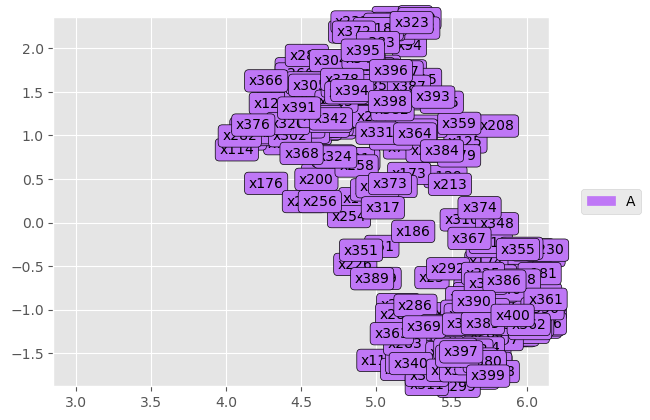

In [88]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [53]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.4  0.46 0.46 0.49 0.48 0.51 0.66 0.59 0.52 0.44 0.5  0.3  0.46 0.4
 0.62 0.41 0.51 0.44 0.5  0.44 0.59 0.34 0.57 0.57 0.63 0.52 0.56 0.6
 0.71 0.46 0.6  0.56 0.45 0.44 0.51 0.51 0.41 0.53 0.44 0.48 0.39 0.4
 0.43 0.45 0.48 0.52 0.31 0.44 0.42 0.37 0.62 0.4  0.4  0.44 0.58 0.42
 0.47 0.43 0.35 0.29 0.57 0.44 0.5  0.56 0.61 0.58 0.61 0.42 0.53 0.57
 0.38 0.56 0.51 0.41 0.39 0.4 ]
Q:  [0.26 0.13 0.22 0.24 0.35 0.16 0.17 0.19 0.27 0.2  0.23 0.19 0.21 0.19
 0.28 0.26 0.34 0.19 0.25 0.32 0.21 0.18 0.26 0.18 0.4  0.35 0.19 0.35
 0.34 0.   0.16 0.27 0.22 0.32 0.19 0.27 0.09 0.   0.16 0.   0.12 0.29
 0.   0.01 0.15 0.05 0.17 0.23 0.21 0.29 0.1  0.   0.2  0.32 0.   0.31
 0.18 0.13 0.3  0.31 0.31 0.18 0.33 0.18 0.21 0.21 0.26 0.14 0.35 0.
 0.05 0.21 0.18 0.   0.19 0.27]
P:  [0.38 0.35 0.29 0.29 0.39 0.31 0.2  0.25 0.29 0.28 0.28 0.28 0.36 0.3
 0.33 0.29 0.44 0.26 0.35 0.49 0.23 0.33 0.28 0.33 0.49 0.4  0.22 0.38
 0.37 0.   0.32 0.32 0.33 0.41 0.24 0.47 0.12 0.   0.21 0.   0.